<a href="https://colab.research.google.com/github/drshahizan/learn-github/blob/main/emanaljabarti/Spamdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
  


In [ ]:
  #Reading the data set of csv format using pandas library
  df=pd.read_csv('spam.csv')
  df.head()

,Id,Tweet,following,followers,actions,is_retweet,location,Type
0,10091,It's the everything else that's complicated. #...,0.0,11500.0,NaN,0.0,Chicago,Quality
1,10172,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,NaN,0.0,NaN,Quality
2,7012,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,NaN,0.0,"Scotland, U.K",Quality
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0.0,"Atlanta, Ga",Spam
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0.0,Blumberg,Spam


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


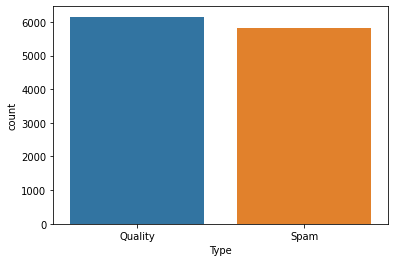

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
   
sns.countplot(df['Type'])
plt.show()
   



In [ ]:
print('Features of Dataset',df.columns)
   

   


Features of Dataset Index(['Id', 'Tweet', 'following', 'followers', 'actions', 'is_retweet',
       'location', 'Type'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


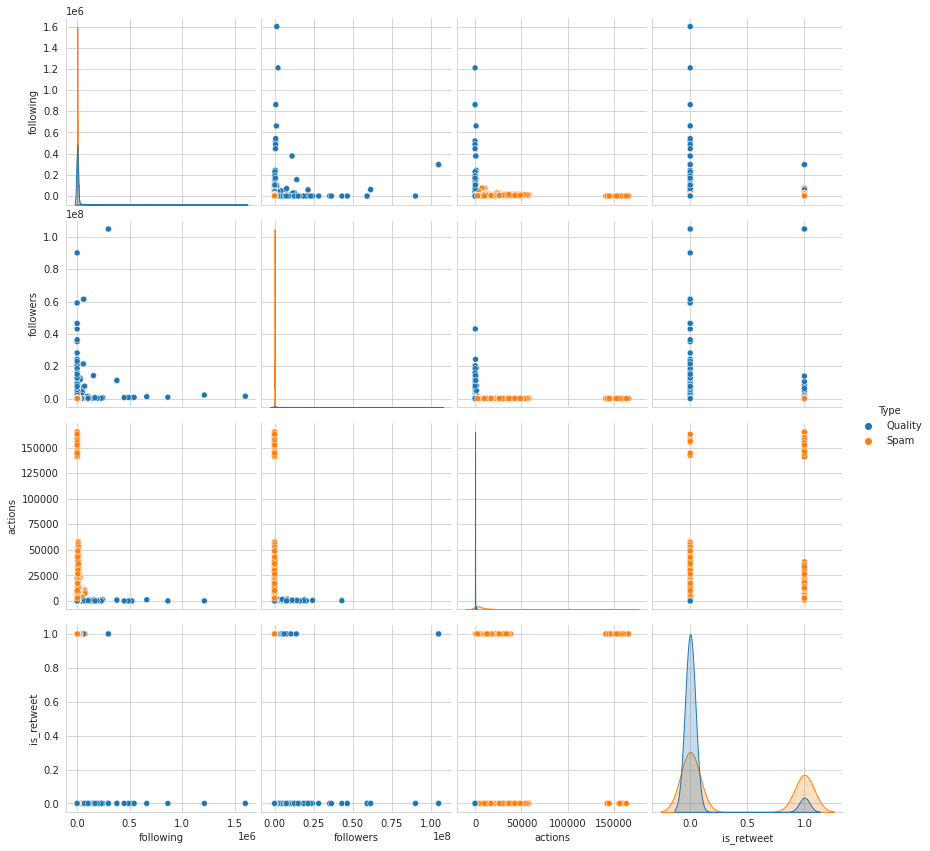

In [ ]:
import numpy as np
ddf=df[['Type','Tweet','following','followers','actions','is_retweet']]
plt.close();
sns.set_style("whitegrid");
sns.pairplot(ddf,hue='Type', size=3);
plt.show()
  

In [ ]:
def chang(num):
  if num=='Quality':
    return 1
  else:
    return 0
a=df['Type'].map(chang)
#df['type']=a
#df['Type'].head()
a

0        1
1        1
2        1
3        0
4        0
        ..
11963    1
11964    1
11965    0
11966    1
11967    0
Name: Type, Length: 11968, dtype: int64

In [ ]:
  #Handling missing values by convertinh the missing value of that feature with the mean value of that feature
  from sklearn.impute import SimpleImputer
  imp = SimpleImputer(missing_values=np.nan, strategy='mean')
  imp.fit(df[['following'	,'followers','is_retweet','actions']])
  SimpleImputer()
  a=imp.transform(df[['following'	,'followers','is_retweet','actions']])
  ddf= pd.DataFrame(a, columns=['following','followers','isretweet','actions'])
  ddf.head()

,following,followers,isretweet,actions
0,0.0,11500.0,0.0,7314.563893
1,0.0,0.0,0.0,7314.563893
2,0.0,0.0,0.0,7314.563893
3,3319.0,611.0,0.0,294.000000
4,4840.0,1724.0,0.0,1522.000000


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
  

  #Appling regular expression,stopwords and stemming of the Tweet feature
  from nltk.corpus import stopwords
  import nltk

  from nltk.stem.porter import PorterStemmer
  ps = PorterStemmer()
  corpus = []
  l=[]
  for i in range(0, len(df)): 
    phrase = re.sub(r"won't", "will not", df['Tweet'][i])
    phrase = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," hashtag ",phrase)
    phrase = re.sub("0-9", "", phrase)
    phrase = re.sub("_", "", phrase)
    phrase =  re.sub(r'https?:\/\/.*[\r\n]*', ' httpstag ',phrase )
    phrase = re.sub("\d+", "", phrase)
    phrase = re.sub(r"aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa", " ", phrase)
    phrase = re.sub(r"aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa$", '', phrase)
    phrase = re.sub(r"aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaah", ' ', phrase)
    phrase = re.sub(r'\?', '', phrase)
    phrase = phrase.lower()
    phrase = phrase.split()
    phrase = [ps.stem(word) for word in phrase if not word in stopwords.words('english')]
    phrase = ' '.join(phrase)
    corpus.append(phrase)
  for w in corpus: 
    l.append(ps.stem(w)) 
  df['Tweet']=l
  

In [ ]:

  #Converting Tweet feature into a vector using Bag of words technique
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Tweet'])
b=vectorizer.get_feature_names()
  
  
 

In [ ]:
 #creating a dataframe of the array which was converted into a vector and concatinating it with other features
df1 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
res = pd.concat([df1, ddf], axis=1)
  
  
#Splitting of data into Test and Train
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(res, df['Type'], test_size=0.5, random_state=42)
  
  #Applying Naive Bayes Algorithm to the training data and prediction on test data
  
  

Number of mislabeled points in training data out of a total 5984 points : 75
Accuracy : 0.9874665775401069
[[3005   61]
 [  14 2904]]


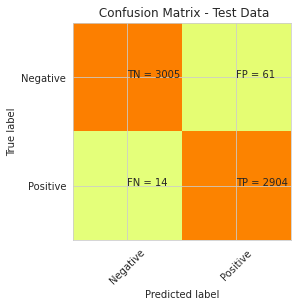

In [ ]:
from sklearn.naive_bayes import BernoulliNB
gnb = BernoulliNB(alpha=1.0)
y_predi = gnb.fit(X_train, Y_train)
y_predi=gnb.predict(X_train)
print("Number of mislabeled points in training data out of a total %d points : %d"
     % (X_train.shape[0], (Y_train != y_predi).sum()))
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print('Accuracy :',accuracy_score(Y_train, y_predi))

cm = confusion_matrix(Y_train, y_predi)
print(cm)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title(' Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()
